# ONNX Graph Visualization 

(-0.5, 6020.5, 18369.5, -0.5)

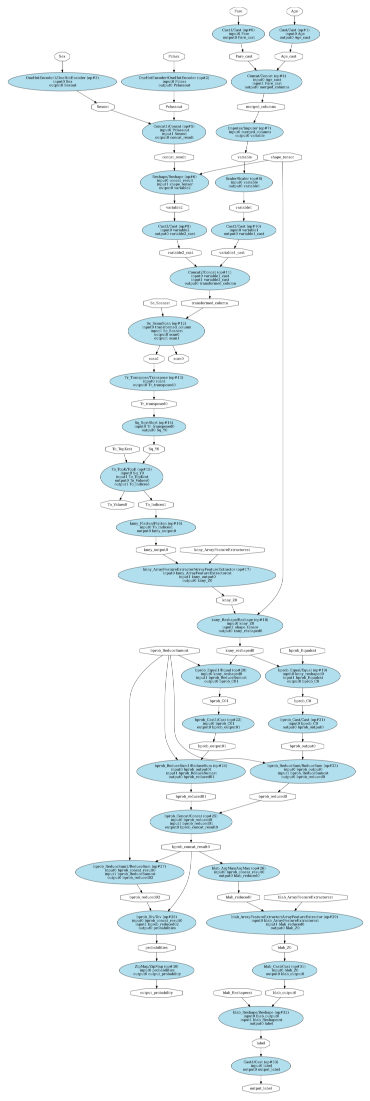

In [16]:
import onnx
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer

pydot_graph = GetPydotGraph(onnx_model.graph, name=onnx_model.graph.name,
                            rankdir="TB",
                            node_producer=GetOpNodeProducer("docstring",
                                                            color="black",
                                                            fillcolor="lightblue2",
                                                            style="filled"))
pydot_graph.write_dot("pipeline_titanic.dot")

os.system('dot -O -Gdpi=300 -Tpng pipeline_titanic.dot')

image = plt.imread("pipeline_titanic.dot.png")
fig, ax = plt.subplots(figsize=(40, 20))
ax.imshow(image)
ax.axis('off')